In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import ipywidgets as widgets
from IPython.display import display

In [2]:
# Cargar el conjunto de datos
df_partidos = pd.read_csv("../partidos_cebollitas_fe82a1a4-e109-41b1-8b78-d9b4341dacaf.csv")

# df_partidos_cebollitas = df_partidos[(df_partidos['equipo_local'] == 'Cebollitas FC') | (df_partidos['equipo_visitante'] == 'Cebollitas FC')]
df_partidos_cebollitas = df_partidos[df_partidos['equipo_local'] == 'Cebollitas FC']
df_partidos_cebollitas.reset_index(drop=True, inplace=True)
df_partidos = df_partidos_cebollitas.copy()

# Crear variable objetivo
df_partidos['diferencia_goles'] = df_partidos['goles_local'] - df_partidos['goles_visitante']

# Variables predictoras
X = df_partidos[['posesion_local (%)', 'tiros_arco_local']]
y = df_partidos['diferencia_goles']

# Division estandar: 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Entrenar modelo de regresión lineal
from sklearn.linear_model import LinearRegression

model_rl = LinearRegression()
model_rl.fit(X_train, y_train)

# Hacer predicciones
y_pred = model_rl.predict(X_test)

In [4]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calcular métricas
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

RMSE: 2.53
R2: -1.73


In [5]:
if r2 < 0:
    print("El modelo tiene un R² negativo, lo que indica que no explica la variabilidad de los datos y es peor que adivinar.")
    print("Considera mejorar el modelo añadiendo variables relevantes o utilizando modelos más complejos.")
elif r2 < 0.3:
    print("El modelo tiene un R² bajo, lo que sugiere que podría estar subajustado (underfitting).")
    print("Considera añadir más variables o utilizar modelos más complejos.")
else:
    print("El modelo tiene un R² aceptable, pero siempre es posible mejorar.")
    print("Considera probar modelos más complejos o ajustar los hiperparámetros.")

El modelo tiene un R² negativo, lo que indica que no explica la variabilidad de los datos y es peor que adivinar.
Considera mejorar el modelo añadiendo variables relevantes o utilizando modelos más complejos.


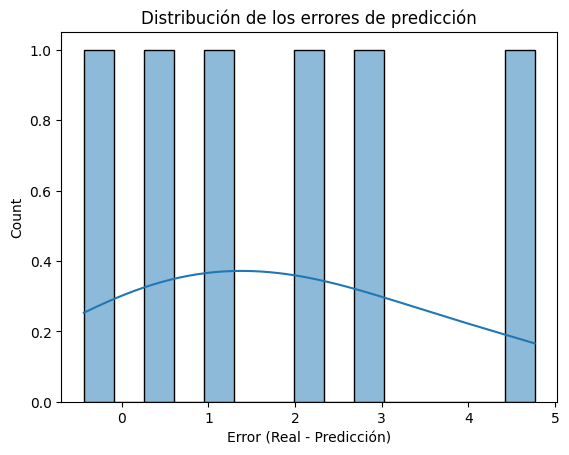

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(y_test - y_pred, kde=True, bins=15)
plt.title("Distribución de los errores de predicción")
plt.xlabel("Error (Real - Predicción)")
plt.show()

## Reflexión

* ¿Qué te dicen estas métricas?
* ¿Crees que las variables usadas realmente capturan lo que determina la diferencia de goles?
* ¿Qué limitaciones tiene la regresión lineal para el fútbol?
* ¿Te parece que este modelo es suficiente para tomar decisiones deportivas?

## ¿Qué podrías probar ahora?

* Añadir nuevas variables (localidad, rival, tiros del rival)
* Probar otro tipo de modelo (Árboles, Random Forest, XGBoost)
* Usar validación cruzada
* Filtrar o transformar datos

**En ML, lo importante no es tener razón... sino aprender rápido cuándo no la tenemos.**